# **Clustering text documents**

Purpose: Clustering text documents using the natural language processing (NLP) conda pack in OCI Data Science

Source: https://blogs.oracle.com/ai-and-datascience/post/natural-language-processing-nlp-conda-pack

Original Author: Wendy Yip, Oracle

Publication Date: June 2, 2021

Original data source: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.html

### Step 1: Import Necessary Libraries

In [36]:
#preceding setup on a new environment.
# you may need to install the following if this is being run on a new environment.
#!pip install umap-learn 
#!pip install umap-learn[plot]
#!pip install sentence-transformers

In [9]:
#check version, if needed
#import sklearn
#sklearn.__version__

In [2]:
import os
cwd = os.getcwd()
print(cwd)

/home/datascience/demos/data_science_getting_started-main


In [11]:
import pandas as pd
import umap
import umap.plot

#used to get the data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#some poltting libraries
import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_notebook, output_file

### Step 2: Load Data

In [12]:
#load data from built in function in sklearn
dataset = fetch_20newsgroups(subset='all', shuffle=True)

What is 'fetch_20newsgroups?

In [13]:
#print(dataset.DESCR)

### Step 3: Look at the Data

In [14]:
#observe 20 news group categories that a post can belong to
dataset.target_names

#alternative method for listing class names in bunch object
#list(dataset.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

What is 'dataset'?

In [15]:
#check variable 
print(type(dataset))
print("\n")
print("Notes: Essentailly, a 'Bunch object' is a Scikit-Learn's name for a dictionary")
print('Read here: https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html')
print('Read here: https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3')

<class 'sklearn.utils.Bunch'>


Notes: Essentailly, a 'Bunch object' is a Scikit-Learn's name for a dictionary
Read here: https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html
Read here: https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3


#### View an example of the data. 

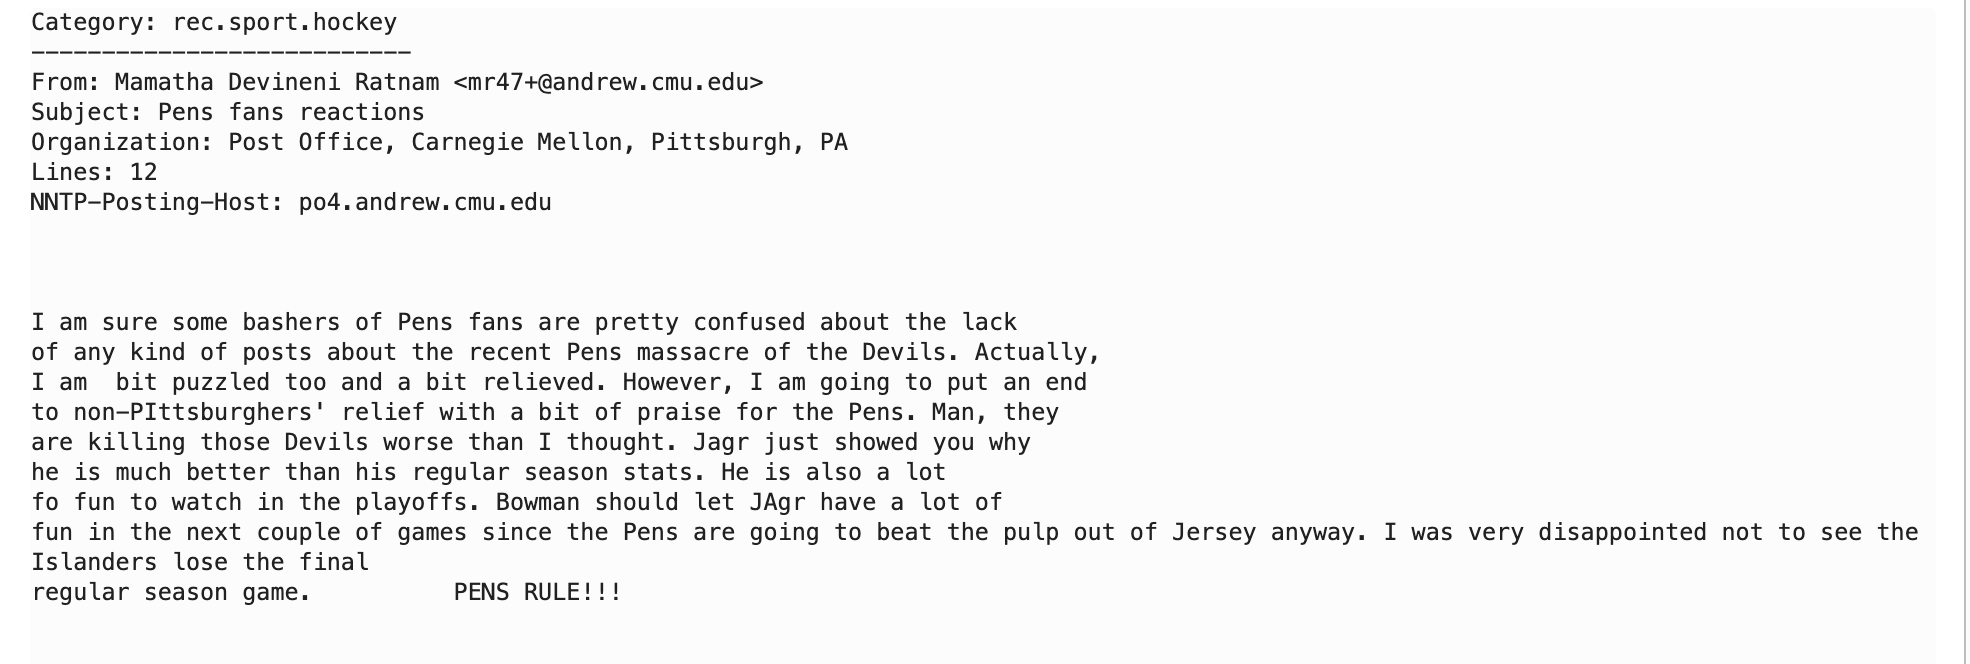

In [18]:
#load the following image
from IPython.display import Image
Image(cwd + "/assets/download.png")

Notice metadata such as title and name. These are parts of the data that a classifier may overfit on. We can use techniques such as TF-IDF to minimize the undesirable data from polluting a classifier.

In [19]:
#we can print a sample of the data from the bunch object
print('Sample 0: ')
print(dataset.data[0])
print()

Sample 0: 
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!





#### Create DataLabels from the Newgroups Categories

In [20]:
category_labels = [dataset.target_names[x] for x in dataset.target]

#### Create Pandas Dataframe of the labels to assist UMAP with plotting

In [21]:
hover_df = pd.DataFrame(category_labels, columns=['category'])

### Step 4: Create Vectors from the Text Data

In this step we will turn the text data into features.  This is known as vectorization.  There are different methods for vecortrizing data. The method used here is cord-count vectorizer.  This uses a "bag-of-words" approach to handle the text data. This is a word-order independent approach that simply counts how many times a particular word appears in a document. We are going to add an additional requirement that a word must be seen at least 5 times to be part of the generated encoded representation of a post. 

In [22]:
#use sklearn's built in CountVectorizer
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform(dataset.data)

### Step 5: Graph Data 

What are we doing here?
We utilize UMAP configured with the cosine distance measurement. UMAP is a general-purpose dimensionality reduction algorithm. We run it in unsupervised mode, and it functions to create an easily visualized 2D representation of our documents. Cosine distance measurement gives a measure of how similar two documents are to each other.  There are different metrics for measuring similarity, and cosine distance is empirically more effective in most NLP tasks than other metrics such as Euclidean distance.  We see how our documents, labeled by the different topics, cluster together.

In [23]:
embedding = umap.UMAP(n_components=2, metric='cosine').fit(word_doc_matrix)

#### Generate a 2D representation of posts:

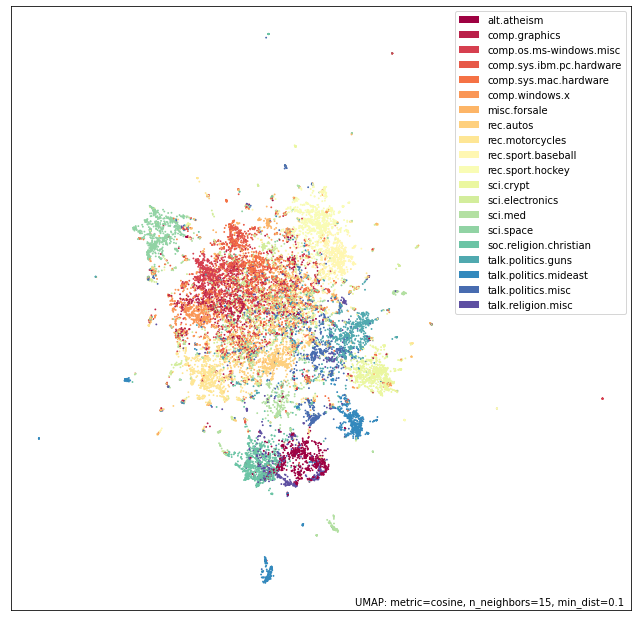

In [24]:
f = umap.plot.points(embedding, labels=hover_df['category'])

In [25]:
dataset2 = fetch_20newsgroups(subset='all', 
                             shuffle=True, random_state=24, remove = ("headers", "footers", "quotes"))

In [26]:
print('Sample 0: ')
print(dataset2.data[0])
print()

Sample 0: 



That is an exceptionally cool idea.
Would it work?

How strong a field is needed?
Anyone?





### Step 6: Utilize TF-IDF to Vectorize Posts

TF-IDF stands for term frequency, inverse document frequency. It gives less weight to words that appear frequently across a large number of documents, since they are more popular in general. It asserts a higher weight to words that appear frequently in a smaller subset of documents, since they are probably important words for those documents.  It is another method for vectorizing text data. We utilize TF-IDF to vectorize our posts and specify that stop words (common words such as the, and) should be removed.

In [27]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(dataset2.data)

#### Create a new set of embeddings and plot it

In [28]:
embedding2 = umap.UMAP(n_components=2, metric='cosine').fit(word_doc_matrix)

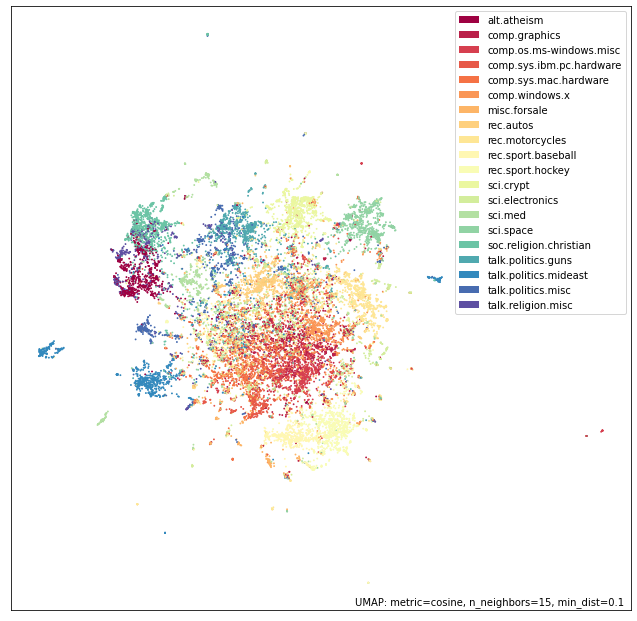

In [29]:
f = umap.plot.points(embedding2, labels=hover_df['category'])

### Step 7: Assessing Information

We can conclude that embeddings with more separation between our labels are more "desirable" in the sense that it is easier to draw a function to separate the labels if the embeddings are more separated. For this reason, it is desirable to see "clumpyness" and the appearance of clusters because that means that the model has meaningfully learned things about the data in an unsupervised fashion.

We see that the addition of TF-IDF along with the preprocessing of the dataset resulted in a significantly more clumpy and reasonable looking embedding. This implies that performance of a classifier which utilized the UMAP representation as its inputs would also likely improve.

Often times, documents do not come with labels. The task is to find ways to group similar documents together. We can use the k-means clustering technique for this. 

### Step 8: Group together similar documents using k-means clustering

We will perform clustering using the TF-IDF vectors we have created. This creates basically a clustering that only accounts for the TF-IDF weighted word counts within the text. This does not take text ordering into account yet. It's still pretty good.

Since clustering is basically asking the computer to "come up with the labels", it would not be interesting to find only 10 clusters. Let's ask the computer to split up the dataset into a finer granularity than it already is, by telling it to give us 20 clusters.

In [30]:
import sklearn.cluster as cluster
import numpy as np

In [31]:
kmeans_labels = cluster.KMeans(n_clusters=40).fit_predict(tfidf_word_doc_matrix)

Get a list of labels which corresponds to which cluster a document belongs to

In [32]:
kmeans_labels

array([ 7,  7,  7, ..., 35,  7, 21], dtype=int32)

We use the function below to get examples out of the original dataset that are part of a particular cluster.

In [33]:
def get_cluster_examples(data, label_list, label, number_of_examples):
    hits = 0
    for idx, document in enumerate(data):
        if kmeans_labels[idx] == label:
            if hits < number_of_examples:
                category = dataset2.target_names[dataset2.target[idx]]
                print(f'Category: {category}')
                print('----------------------------')
                print(document)
                print('----------------------------')
                hits += 1

### Step 9: Utilize Transformer Language Model - BERT

We can also demonstrate the power of Transformer Language models using a simple but strong BERT based paraphrasing model. This model stake word order and semantic meaning into account beyond what TF-IDF is capable of.  This model will create a different vector representation of our text data

In [37]:
from sentence_transformers import SentenceTransformer
transformer_model = SentenceTransformer('paraphrase-distilroberta-base-v1')

### Step 10: Encode Data Again

In [ ]:
sentence_embeddings = transformer_model.encode(dataset2.data)

### Step 11 Plot the new embeddings and compare to the ones generated from TF-ID

In [ ]:
embedding3 = umap.UMAP(n_components=2, metric='cosine').fit(sentence_embeddings)

In [ ]:
g = umap.plot.points(embedding3, labels=hover_df['category'])

### Summary

We showed an example of how to group documents from the 20 Newsgroups dataset. We then demonstrated how to pre-process the data, create vectors from the text data using Count Vectorizer, TF-IDF, and a Transformer-based model for word embeddings, and visualize the grouping of the posts. We also used k-means clustering to group the posts and look at how the method group compared to the labels already assigned to the posts.